In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# diabates 데이터 CSV 파일 경로 설정
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)

# 데이터프레임 확인
display(df.head())
print("컬럼 목록:", df.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


컬럼 목록: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [3]:
# 결측치 확인
print(df.isnull().sum(),"\n")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64 



In [5]:
# 레이블의 데이터 비율을 확인(imbalanced data인지 확인)
print(df['Outcome'].value_counts(),"\n")

Outcome
0    500
1    268
Name: count, dtype: int64 



# 원-핫 인코딩

In [6]:
y = df['Outcome']   # 레이블(Label) 데이터
Y = pd.get_dummies(y).values
Y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

# Numpy 변환

In [8]:
X = df.drop('Outcome', axis=1).values  # 특성(Feature) 데이터

# Data split & shape 확인

In [9]:
# x/y데이터. train/test 데이터 분리 (학습 80%, 테스트 20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# shape 출력(인스턴스의 개수, 특성의 개수)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((614, 8), (614, 2), (154, 8), (154, 2))

# Sequential 모델 생성

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='relu')) # input_shape 숫자를 컬럼의 개수와 맞추지 않으면 오류 발생
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mse'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 714 (2.79 KB)

 Trainable params: 714 (2.79 KB)

 Non-trainable params: 0 (0.00 B)

# 모델에 fit

In [15]:
N_EPOCHS = 30

# validation data에 Y_test를 넣어서 train하면 안됨
model_history=model.fit(x=X_train, y=Y_train, epochs=N_EPOCHS, batch_size=32,validation_split=0.1)
Y_pred = model.predict(X_test)

# one-hot encoding 데이터를 정수 라벨로 변환
Y_test_class = np.argmax(Y_test, axis=1)
Y_pred_class = np.argmax(Y_pred, axis=1)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 34.5440 - mse: 0.6506 - val_loss: 13.6611 - val_mse: 0.5445
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.7323 - mse: 0.5790 - val_loss: 5.5561 - val_mse: 0.4078
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4494 - mse: 0.4308 - val_loss: 2.8215 - val_mse: 0.3291
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6296 - mse: 0.3655 - val_loss: 1.4078 - val_mse: 0.2554
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6537 - mse: 0.3229 - val_loss: 1.1482 - val_mse: 0.2583
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8038 - mse: 0.2897 - val_loss: 1.0360 - val_mse: 0.2616
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2200 - mse: 0.2675 - val_loss: 1.0267 - val_mse: 0.2650
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0748 - mse: 0.2741 - val_loss: 1.0067 - val_mse: 0.2695
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8985 - m

# loss 체크

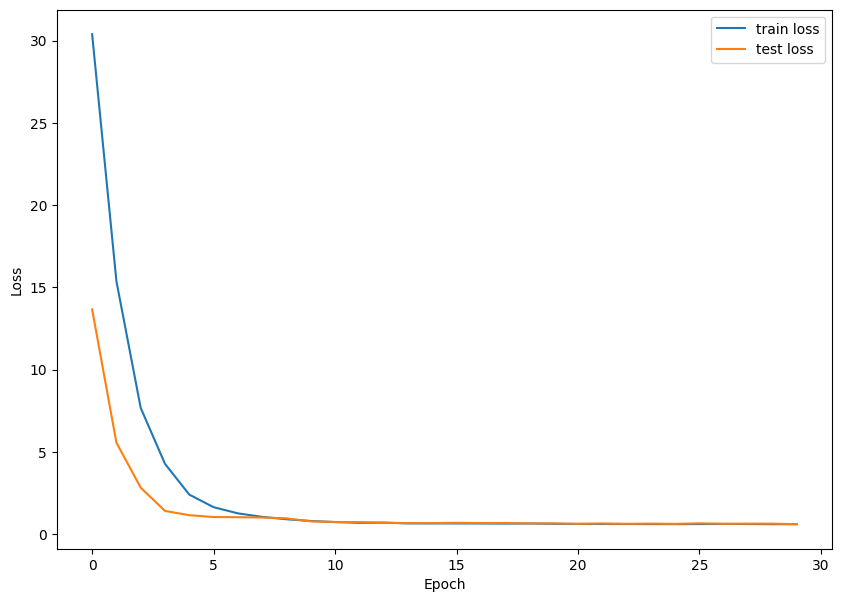

In [17]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), model_history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), model_history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 평가

In [18]:
model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6334 - mse: 0.2143 


[0.656435489654541, 0.22259670495986938]